# Dataset 1 - Household Income in the Past 12 Months in San Diego County

**Stephanie Andrade**

In this dataset I will analyze income in San Diego County. Specifically, looking at how income is dispersed throughout each tract. The goal of this analysis is to understand how the county stands and potenital displacement vulnerability some tracts hav eover others.

**Step 1: Import you libraries and dataset**

In [1]:
import pandas as pd
import geopandas as gpd 
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('data/acs2019_5yr_B19001.geojson')

**Step 2: Size of the dataset along with quick sample of our imported data**


In [3]:
gdf.shape

(628, 37)

In [4]:
gdf.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",1258.0,84.0,36.0,29.0,11.0,16.0,10.0,15.0,...,48.0,113.0,55.0,121.0,58.0,94.0,43.0,508.0,91.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",1080.0,63.0,84.0,48.0,37.0,31.0,54.0,33.0,...,74.0,100.0,53.0,49.0,32.0,153.0,56.0,161.0,64.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",2333.0,116.0,102.0,90.0,16.0,28.0,93.0,92.0,...,143.0,281.0,164.0,160.0,107.0,106.0,72.0,260.0,103.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",3004.0,176.0,123.0,113.0,168.0,103.0,50.0,49.0,...,201.0,160.0,67.0,199.0,123.0,229.0,108.0,310.0,139.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",2038.0,198.0,42.0,39.0,29.0,44.0,53.0,107.0,...,134.0,218.0,129.0,116.0,109.0,157.0,81.0,162.0,87.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


**Step 3: We want to see what our entire plot will look like based on our data and geometry column. This code gives us a quick overview of what we should expect after importing all the data.**

<AxesSubplot:>

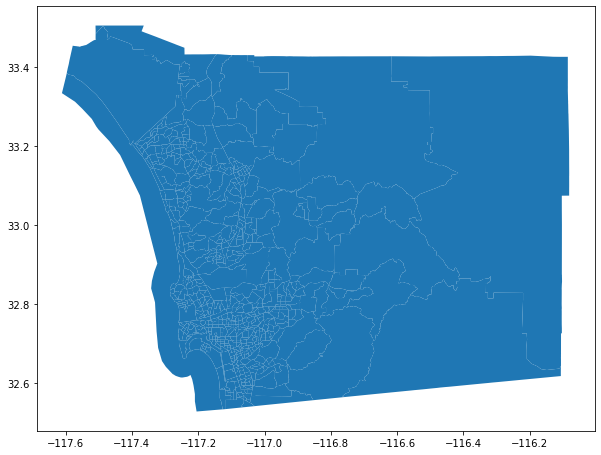

In [5]:
gdf.plot(figsize=(10,10))

**Display entire dataset**

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
gdf.sample()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
513,14000US06073018906,"Census Tract 189.06, San Diego, CA",2110.0,98.0,115.0,63.0,18.0,25.0,62.0,48.0,138.0,86.0,106.0,71.0,81.0,73.0,85.0,93.0,88.0,70.0,52.0,39.0,249.0,122.0,253.0,93.0,221.0,104.0,278.0,107.0,75.0,51.0,245.0,96.0,44.0,27.0,"MULTIPOLYGON (((-117.26207 33.35834, -117.2620..."


**Step 4:**
Get a quick overview of what the dataset consists of. This dataset includes afew columns we will need to delete that are not relative or accessible for use. These are inducated by the "error" nect to Column name.

In [8]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             628 non-null    object  
 1   name              628 non-null    object  
 2   B19001001         628 non-null    float64 
 3   B19001001, Error  628 non-null    float64 
 4   B19001002         628 non-null    float64 
 5   B19001002, Error  628 non-null    float64 
 6   B19001003         628 non-null    float64 
 7   B19001003, Error  628 non-null    float64 
 8   B19001004         628 non-null    float64 
 9   B19001004, Error  628 non-null    float64 
 10  B19001005         628 non-null    float64 
 11  B19001005, Error  628 non-null    float64 
 12  B19001006         628 non-null    float64 
 13  B19001006, Error  628 non-null    float64 
 14  B19001007         628 non-null    float64 
 15  B19001007, Error  628 non-null    float64 
 16  B19001008         

In [ ]:
gdf.geoid.head()

0    14000US06073000100
1    14000US06073000201
2    14000US06073000202
3    14000US06073000300
4    14000US06073000400
Name: geoid, dtype: object

**Step 5:**
Next, we will need to look specifically at the columns and remove the duplicates with "error" at the end of the name. First they are listed our for better overview.

In [10]:
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

**Next we create a new variable that removes the rows that are not needed.**

In [11]:
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [12]:
gdf = gdf[columns_to_keep]

**We double check our dataset to make sure the columns we wanted to delete were deleted.**

In [13]:
gdf.tail(5)

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
623,14000US06073021800,"Census Tract 218, San Diego, CA",937.0,36.0,0.0,22.0,40.0,5.0,12.0,14.0,7.0,0.0,39.0,43.0,97.0,97.0,62.0,189.0,274.0,"MULTIPOLYGON (((-117.19351 32.68665, -117.1930..."
624,14000US06073021900,"Census Tract 219, San Diego, CA",708.0,46.0,33.0,55.0,26.0,56.0,42.0,34.0,65.0,6.0,78.0,88.0,83.0,55.0,13.0,25.0,3.0,"MULTIPOLYGON (((-117.13542 32.67861, -117.1344..."
625,14000US06073022000,"Census Tract 220, San Diego, CA",1262.0,65.0,56.0,95.0,129.0,77.0,22.0,66.0,74.0,153.0,76.0,94.0,205.0,69.0,66.0,15.0,0.0,"MULTIPOLYGON (((-117.09394 32.68710, -117.0936..."
626,14000US06073022100,"Census Tract 221, San Diego, CA",3583.0,130.0,26.0,18.0,106.0,54.0,116.0,195.0,64.0,17.0,191.0,274.0,395.0,342.0,149.0,452.0,1054.0,"MULTIPOLYGON (((-117.33371 33.14433, -117.3336..."
627,14000US06073990100,"Census Tract 9901, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.61104 33.33413, -117.6086..."


In [14]:
gdf.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",1258.0,36.0,11.0,10.0,0.0,21.0,33.0,64.0,41.0,18.0,28.0,53.0,107.0,113.0,121.0,94.0,508.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",1080.0,84.0,37.0,54.0,81.0,22.0,20.0,10.0,0.0,53.0,59.0,54.0,143.0,100.0,49.0,153.0,161.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",2333.0,102.0,16.0,93.0,135.0,91.0,73.0,33.0,47.0,175.0,198.0,173.0,390.0,281.0,160.0,106.0,260.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",3004.0,123.0,168.0,50.0,100.0,0.0,115.0,123.0,171.0,52.0,262.0,458.0,484.0,160.0,199.0,229.0,310.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",2038.0,42.0,29.0,53.0,66.0,51.0,83.0,126.0,98.0,149.0,193.0,196.0,299.0,218.0,116.0,157.0,162.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


In [15]:
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

**Step 6:**
After cleaning the columns we want to rename them to names that are legible to those looking at our data. We use metadata to see appropriate names for columns.

In [16]:
gdf.columns = ['geoid',
 'name',
 'Total',
 '< $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',   
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 <',
 'geometry']

**New Column names for data**

In [17]:
gdf.head()

,geoid,name,Total,"< $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 <",geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",1258.0,36.0,11.0,10.0,0.0,21.0,33.0,64.0,41.0,18.0,28.0,53.0,107.0,113.0,121.0,94.0,508.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",1080.0,84.0,37.0,54.0,81.0,22.0,20.0,10.0,0.0,53.0,59.0,54.0,143.0,100.0,49.0,153.0,161.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",2333.0,102.0,16.0,93.0,135.0,91.0,73.0,33.0,47.0,175.0,198.0,173.0,390.0,281.0,160.0,106.0,260.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",3004.0,123.0,168.0,50.0,100.0,0.0,115.0,123.0,171.0,52.0,262.0,458.0,484.0,160.0,199.0,229.0,310.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",2038.0,42.0,29.0,53.0,66.0,51.0,83.0,126.0,98.0,149.0,193.0,196.0,299.0,218.0,116.0,157.0,162.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


**Step 7:**
Checking our new dataset. In order to check our dataset we can pull a random row and make sure the numbers still add up.

In [18]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,"< $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 <",geometry
487,14000US06073018510,"Census Tract 185.10, San Diego, CA",934.0,56.0,13.0,28.0,34.0,8.0,50.0,5.0,10.0,36.0,111.0,124.0,167.0,98.0,99.0,66.0,29.0,"MULTIPOLYGON (((-117.35921 33.20855, -117.3585..."


**We can also check our data by checking the total of the random row that was pulled.**

In [19]:
random_tract.iloc[0]['Total']

934.0

In [20]:
print('Total population in tract: ' + str(random_tract.iloc[0]['Total']))

Total population: 934.0


**To add the row total you can also add each individual column to get the same total that was gotten in the previous code that was run.**

In [21]:
print(random_tract.iloc[0]['< $10,000'] + 
      random_tract.iloc[0]['$10,000 to $14,999'] + 
      random_tract.iloc[0]['$15,000 to $19,999'] + 
      random_tract.iloc[0]['$20,000 to $24,999'] + 
      random_tract.iloc[0]['$25,000 to $29,999'] + 
      random_tract.iloc[0]['$30,000 to $34,999'] + 
      random_tract.iloc[0]['$35,000 to $39,999'] + 
      random_tract.iloc[0]['$40,000 to $44,999'] +     
      random_tract.iloc[0]['$45,000 to $49,999'] + 
      random_tract.iloc[0]['$50,000 to $59,999'] + 
      random_tract.iloc[0]['$60,000 to $74,999'] + 
      random_tract.iloc[0]['$75,000 to $99,999'] + 
      random_tract.iloc[0]['$100,000 to $124,999'] + 
      random_tract.iloc[0]['$125,000 to $149,999'] +
      random_tract.iloc[0]['$150,000 to $199,999'] + 
      random_tract.iloc[0]['$200,000 <'])

934.0


In [22]:
gdf['Total'].head()

0    1258.0
1    1080.0
2    2333.0
3    3004.0
4    2038.0
Name: Total, dtype: float64

**Step 8:**
Our data also allows us to calculate basic statistics. These statistics were calcualted based on the raw data so we get the average amount of incomes in each Census Tract. In order to calculate a more meaningful average or median we can reorganize the data to find the average an mean of each tract. These are just overall statistics of the entire dataset.

**Average**

In [23]:
gdf['Total'].mean()

1791.8566878980891

**Median**

In [24]:
gdf['Total'].median()

1661.0

**All Stats:**
Count, Average, standard deviation, minimum, percentiles, and maximums

In [25]:
gdf['Total'].describe()

count     628.000000
mean     1791.856688
std       913.150862
min         0.000000
25%      1218.500000
50%      1661.000000
75%      2176.500000
max      8708.000000
Name: Total, dtype: float64

**Plot of Overall data in a histogram showing distribution thorughout each tract**

<AxesSubplot:ylabel='Frequency'>

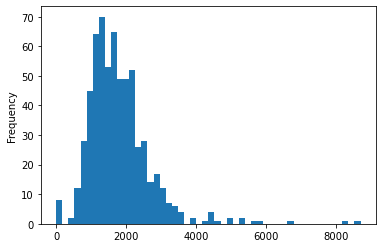

In [26]:
 gdf['Total'].plot.hist(bins=50)

**Sorting data to show the 10 most populated tracts in our dataset**

This organizes them by total in each row by ascending value and only pulls the columns we want to see.

In [27]:
gdf_sorted = gdf.sort_values(by='Total',ascending = False)

In [28]:
gdf_sorted[['geoid','Total']].head(10)

,geoid,Total
307,14000US06073013310,8708.0
425,14000US06073017030,8271.0
506,14000US06073018700,6745.0
564,14000US06073020027,5897.0
311,14000US06073013314,5708.0
310,14000US06073013313,5360.0
155,14000US06073008333,5340.0
550,14000US06073020013,4970.0
102,14000US06073005400,4965.0
543,14000US06073019806,4557.0


**Plotting the Top 10 Census Tracts in our dataset**

<AxesSubplot:>

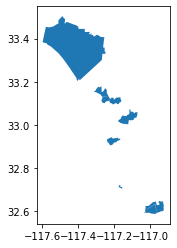

In [29]:
gdf_sorted.head(10).plot()

**Increasing the total that is plotted. This second map shows the top 100 in our dataset.**

<AxesSubplot:>

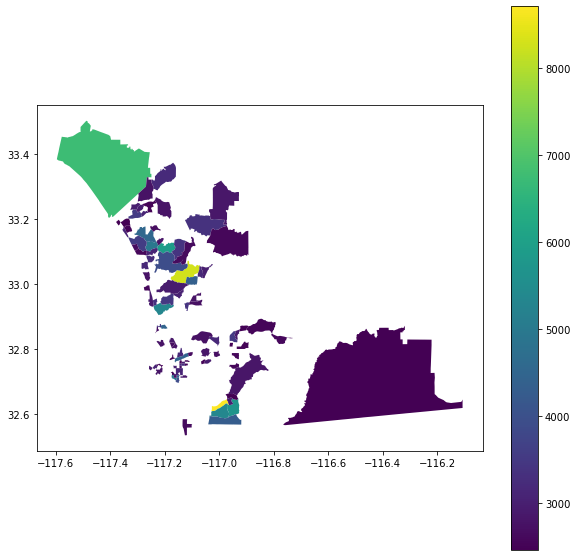

In [30]:
gdf_sorted.head(100).plot(figsize=(10,10),column='Total',legend=True)

**Step 10:**

Checking our dataset for rows with no valuable data totals. We have a total of 6 rows in our data that have zero values in each tract. These can be removed from our data since they will not affect our overall analysis of the data.

In [31]:
gdf[gdf['Total']==0]

,geoid,name,Total,"< $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 <",geometry
85,14000US06073003800,"Census Tract 38, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.13497 32.68449, -117.1336..."
103,14000US06073005500,"Census Tract 55, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.15125 32.72410, -117.1512..."
110,14000US06073006200,"Census Tract 62, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.21404 32.72445, -117.2140..."
111,14000US06073006300,"Census Tract 63, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.20967 32.73564, -117.2080..."
238,14000US06073009902,"Census Tract 99.02, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.23991 32.69564, -117.2398..."
627,14000US06073990100,"Census Tract 9901, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.61104 33.33413, -117.6086..."


**Relabel these and "gdf_no_pop"**

In [32]:
gdf_no_pop = gdf[gdf['Total']==0]

**Use a code to write a small sentence that indicated the number of census tracts with no people in them.**

In [33]:
print('There are ' + str(len(gdf_no_pop)) + ' census tracts with no people in them')

There are 6 census tracts with no people in them


In [35]:
gdf_no_pop[['geoid','Total']]

,geoid,Total
85,14000US06073003800,0.0
103,14000US06073005500,0.0
110,14000US06073006200,0.0
111,14000US06073006300,0.0
238,14000US06073009902,0.0
627,14000US06073990100,0.0


In [36]:
list(gdf)

['geoid',
 'name',
 'Total',
 '< $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 <',
 'geometry']

**Out of curiousity I wanted to see if I could indicate the median in each tract. I created a new row that pulled the max total from each row. I wanted to eventually be able to indcate the name of the column that is the highest in each census tract.**

In [38]:
gdf['Max Tract Income'] = gdf[[ '< $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 <']].max(axis=1)

**Calculating the percent of each column to prepare to plot**

In [39]:
gdf['Percent Max Tract Income'] = gdf['Max Tract Income']/gdf['Total']*100
gdf['Percent < $10,000'] = gdf['< $10,000']/gdf['Total']*100
gdf['Percent $10,000 to $14,999'] = gdf['$10,000 to $14,999']/gdf['Total']*100
gdf['Percent $15,000 to $19,999'] = gdf['$15,000 to $19,999']/gdf['Total']*100
gdf['Percent $20,000 to $24,999'] = gdf['$20,000 to $24,999']/gdf['Total']*100
gdf['Percent $25,000 to $29,999'] = gdf['$25,000 to $29,999']/gdf['Total']*100
gdf['Percent $30,000 to $34,999'] = gdf['$30,000 to $34,999']/gdf['Total']*100
gdf['Percent $35,000 to $39,999'] = gdf['$35,000 to $39,999']/gdf['Total']*100
gdf['Percent $40,000 to $44,999'] = gdf['$40,000 to $44,999']/gdf['Total']*100
gdf['Percent $45,000 to $49,999'] = gdf['$45,000 to $49,999']/gdf['Total']*100
gdf['Percent $50,000 to $59,999'] = gdf['$50,000 to $59,999']/gdf['Total']*100
gdf['Percent $60,000 to $74,999'] = gdf['$60,000 to $74,999']/gdf['Total']*100
gdf['Percent $75,000 to $99,999'] = gdf['$75,000 to $99,999']/gdf['Total']*100
gdf['Percent $100,000 to $124,999'] = gdf['$100,000 to $124,999']/gdf['Total']*100
gdf['Percent $125,000 to $149,999'] = gdf['$125,000 to $149,999']/gdf['Total']*100
gdf['Percent $150,000 to $199,999'] = gdf['$150,000 to $199,999']/gdf['Total']*100
gdf['Percent $200,000 <'] = gdf['$200,000 <']/gdf['Total']*100

**Pull a data sample to be able to see that the new columns with percentages were created.**

In [53]:
gdf.sample(5)

,geoid,name,Total,"< $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 <",geometry,Max Tract Income,Percent Max Tract Income,"Percent < $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $25,000 to $29,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 <"
425,14000US06073017030,"Census Tract 170.30, San Diego, CA",8271.0,197.0,174.0,298.0,168.0,57.0,348.0,113.0,76.0,0.0,324.0,238.0,598.0,975.0,954.0,1046.0,2705.0,"MULTIPOLYGON (((-117.17832 33.01837, -117.1782...",2705.0,32.704631,2.381816,2.103736,3.602950,2.031193,0.689155,4.207472,1.366219,0.918873,0.000000,3.917301,2.877524,7.230081,11.788176,11.534276,12.646597,32.704631
331,14000US06073013605,"Census Tract 136.05, San Diego, CA",2001.0,14.0,60.0,95.0,20.0,10.0,28.0,34.0,55.0,62.0,99.0,116.0,245.0,225.0,251.0,278.0,409.0,"MULTIPOLYGON (((-116.97020 32.76239, -116.9701...",409.0,20.439780,0.699650,2.998501,4.747626,0.999500,0.499750,1.399300,1.699150,2.748626,3.098451,4.947526,5.797101,12.243878,11.244378,12.543728,13.893053,20.439780
37,14000US06073002708,"Census Tract 27.08, San Diego, CA",2016.0,179.0,277.0,214.0,205.0,189.0,83.0,133.0,82.0,58.0,210.0,171.0,147.0,52.0,5.0,0.0,11.0,"MULTIPOLYGON (((-117.08742 32.75120, -117.0873...",277.0,13.740079,8.878968,13.740079,10.615079,10.168651,9.375000,4.117063,6.597222,4.067460,2.876984,10.416667,8.482143,7.291667,2.579365,0.248016,0.000000,0.545635
389,14000US06073016503,"Census Tract 165.03, San Diego, CA",1091.0,27.0,48.0,86.0,75.0,49.0,19.0,16.0,50.0,8.0,40.0,143.0,218.0,173.0,68.0,37.0,34.0,"MULTIPOLYGON (((-116.96163 32.82514, -116.9614...",218.0,19.981668,2.474794,4.399633,7.882676,6.874427,4.491292,1.741522,1.466544,4.582951,0.733272,3.666361,13.107241,19.981668,15.857012,6.232814,3.391384,3.116407
36,14000US06073002707,"Census Tract 27.07, San Diego, CA",1574.0,92.0,162.0,137.0,193.0,125.0,71.0,112.0,98.0,53.0,115.0,141.0,179.0,48.0,22.0,0.0,26.0,"MULTIPOLYGON (((-117.09227 32.74990, -117.0922...",193.0,12.261753,5.844981,10.292249,8.703939,12.261753,7.941550,4.510801,7.115629,6.226175,3.367217,7.306226,8.958069,11.372300,3.049555,1.397713,0.000000,1.651842


**Step 11:**

Plotting our new percentages. These can be plotted 3 different ways: natural breaks, quantiles, or equal intervals. These determine the legends and the way the tracts are color coded as indicated to the top right of each plot. In our case I analyzed the total of people making more than $200,000. The totals ranged between 0 - 55%. To see the larger portion of individuals making that total then we can use larger spaced legends.

<AxesSubplot:>

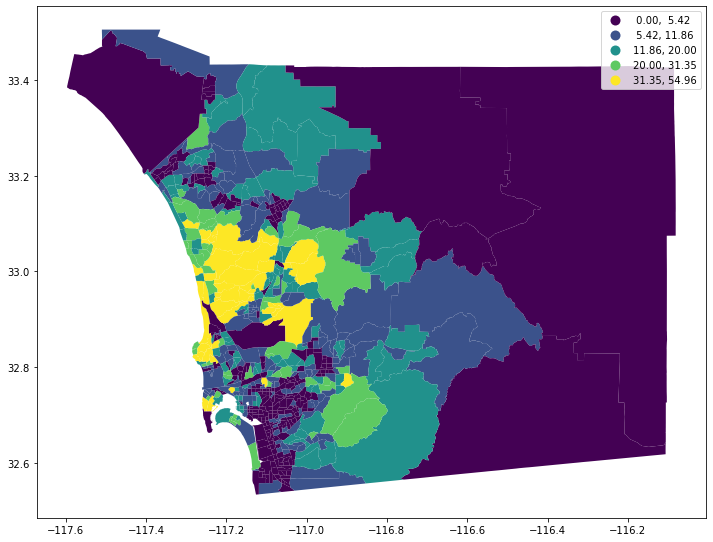

In [54]:
gdf.plot(figsize=(12,10),
                 column='Percent $200,000 <',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

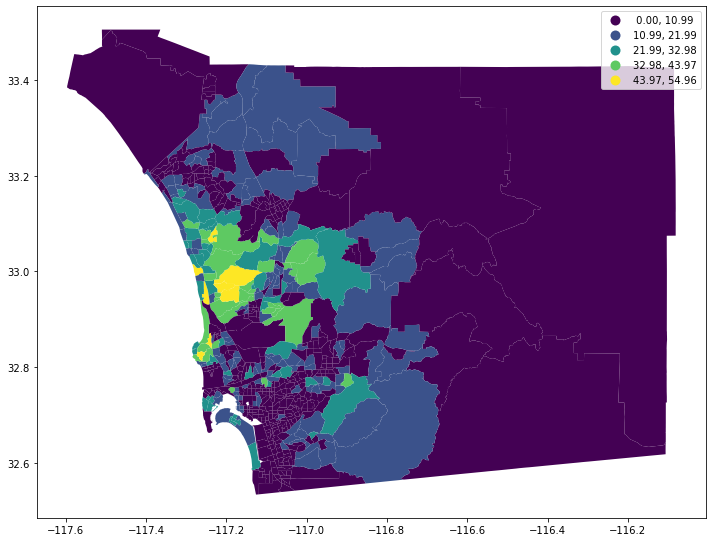

In [55]:
gdf.plot(figsize=(12,10),
                 column='Percent $200,000 <',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

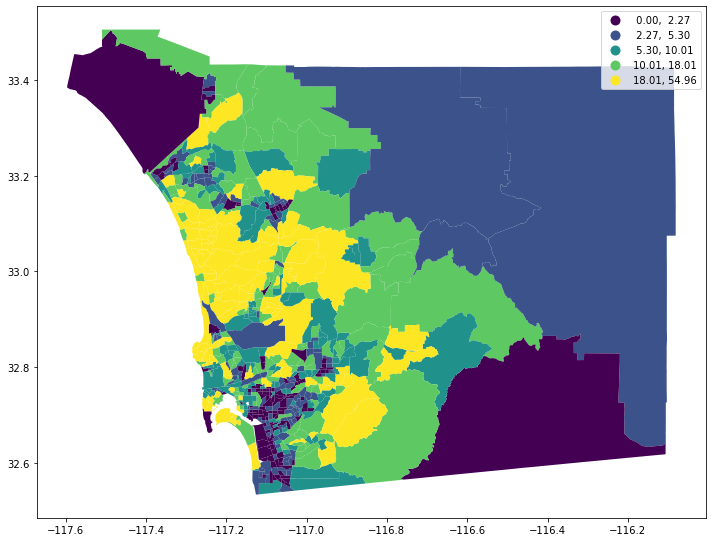

In [56]:
gdf.plot(figsize=(12,10),
                 column='Percent $200,000 <',
                 legend=True, 
                 scheme='quantiles')

**Step 12:**

Side by side plots

The plots reflect those who make more than $200,000 in each census tract and less than $10,000. These are to compare the minimum points in our dataset and the maximum. In each plot we see how the tracts that are higher number of people making $200,00 a year show a smalled portion of people making less than $10,000 a year.

Text(0.5, 1.0, 'Percent < $10,000')

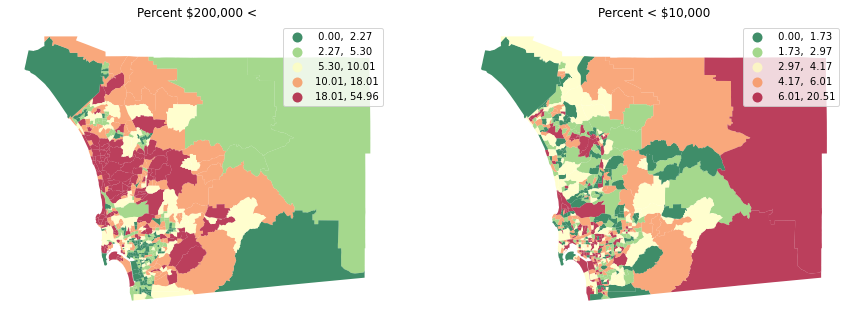

In [77]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

gdf.plot(column='Percent $200,000 <', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent $200,000 <")


gdf.plot(column='Percent < $10,000', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent < $10,000")

In [76]:
gdf[gdf['Percent $200,000 <'] > 40]

,geoid,name,Total,"< $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 <",geometry,Max Tract Income,Percent Max Tract Income,"Percent < $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $25,000 to $29,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 <"
0,14000US06073000100,"Census Tract 1, San Diego, CA",1258.0,36.0,11.0,10.0,0.0,21.0,33.0,64.0,41.0,18.0,28.0,53.0,107.0,113.0,121.0,94.0,508.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",508.0,40.381558,2.861685,0.874404,0.794913,0.000000,1.669316,2.623211,5.087440,3.259141,1.430843,2.225755,4.213037,8.505564,8.982512,9.618442,7.472178,40.381558
145,14000US06073008310,"Census Tract 83.10, San Diego, CA",2201.0,108.0,0.0,47.0,90.0,96.0,12.0,63.0,31.0,29.0,86.0,80.0,135.0,128.0,277.0,136.0,883.0,"MULTIPOLYGON (((-117.26036 32.81242, -117.2603...",883.0,40.118128,4.906861,0.000000,2.135393,4.089050,4.361654,0.545207,2.862335,1.408451,1.317583,3.907315,3.634711,6.133576,5.815538,12.585189,6.179010,40.118128
146,14000US06073008311,"Census Tract 83.11, San Diego, CA",1068.0,19.0,26.0,0.0,0.0,19.0,0.0,30.0,9.0,10.0,10.0,22.0,89.0,77.0,20.0,150.0,587.0,"MULTIPOLYGON (((-117.27352 32.82744, -117.2733...",587.0,54.962547,1.779026,2.434457,0.000000,0.000000,1.779026,0.000000,2.808989,0.842697,0.936330,0.936330,2.059925,8.333333,7.209738,1.872659,14.044944,54.962547
148,14000US06073008313,"Census Tract 83.13, San Diego, CA",816.0,12.0,0.0,16.0,15.0,6.0,9.0,10.0,6.0,18.0,25.0,29.0,45.0,84.0,32.0,103.0,406.0,"MULTIPOLYGON (((-117.25260 32.85041, -117.2524...",406.0,49.754902,1.470588,0.000000,1.960784,1.838235,0.735294,1.102941,1.225490,0.735294,2.205882,3.063725,3.553922,5.514706,10.294118,3.921569,12.622549,49.754902
149,14000US06073008324,"Census Tract 83.24, San Diego, CA",2918.0,102.0,0.0,11.0,17.0,18.0,29.0,97.0,33.0,0.0,226.0,92.0,349.0,214.0,147.0,250.0,1333.0,"MULTIPOLYGON (((-117.26095 32.94810, -117.2607...",1333.0,45.681974,3.495545,0.000000,0.376971,0.582591,0.616861,0.993831,3.324195,1.130912,0.000000,7.745031,3.152844,11.960247,7.333790,5.037697,8.567512,45.681974
151,14000US06073008328,"Census Tract 83.28, San Diego, CA",2155.0,56.0,53.0,34.0,29.0,16.0,13.0,15.0,42.0,20.0,45.0,62.0,121.0,112.0,137.0,329.0,1071.0,"MULTIPOLYGON (((-117.23184 32.97296, -117.2318...",1071.0,49.698376,2.598608,2.459397,1.577726,1.345708,0.742459,0.603248,0.696056,1.948956,0.928074,2.088167,2.877030,5.614849,5.197216,6.357309,15.266821,49.698376
154,14000US06073008331,"Census Tract 83.31, San Diego, CA",907.0,8.0,12.0,29.0,6.0,0.0,31.0,10.0,29.0,5.0,0.0,60.0,52.0,36.0,89.0,145.0,395.0,"MULTIPOLYGON (((-117.23082 32.94176, -117.2307...",395.0,43.550165,0.882029,1.323043,3.197354,0.661521,0.000000,3.417861,1.102536,3.197354,0.551268,0.000000,6.615215,5.733186,3.969129,9.812569,15.986770,43.550165
155,14000US06073008333,"Census Tract 83.33, San Diego, CA",5340.0,215.0,28.0,0.0,32.0,41.0,27.0,36.0,0.0,41.0,40.0,220.0,597.0,456.0,495.0,936.0,2176.0,"MULTIPOLYGON (((-117.24117 32.93135, -117.2410...",2176.0,40.749064,4.026217,0.524345,0.000000,0.599251,0.767790,0.505618,0.674157,0.000000,0.767790,0.749064,4.119850,11.179775,8.539326,9.269663,17.528090,40.749064
156,14000US06073008335,"Census Tract 83.35, San Diego, CA",3033.0,133.0,147.0,52.0,31.0,20.0,0.0,61.0,50.0,19.0,137.0,117.0,246.0,202.0,245.0,332.0,1241.0,"MULTIPOLYGON (((-117.16768 32.96933, -117.1676...",1241.0,40.916584,4.385097,4.846686,1.714474,1.02209

**Lastly!**

We can plot our Census tract data on a baseline map to have a better understanding of where in SAn Diego county these folks reside.

I realized that the percentage in the code must not exeed that of the percetage that is available in that Census Tract. I chose to plot individuals that reports more than a $200,000 income which did not exceed about 50% of people in each tract. To expand the data sections that are about to be plotted I reduced it to 40% and we see the predominantly high income areas in San Diego County below.

<AxesSubplot:>

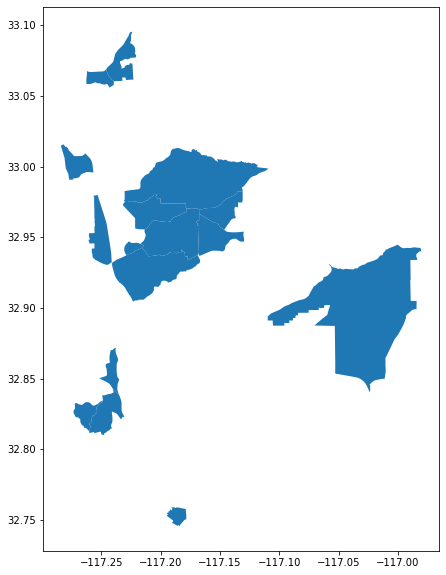

In [83]:
gdf[gdf['Percent $200,000 <'] > 40].plot(figsize=(12,10))

In [84]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

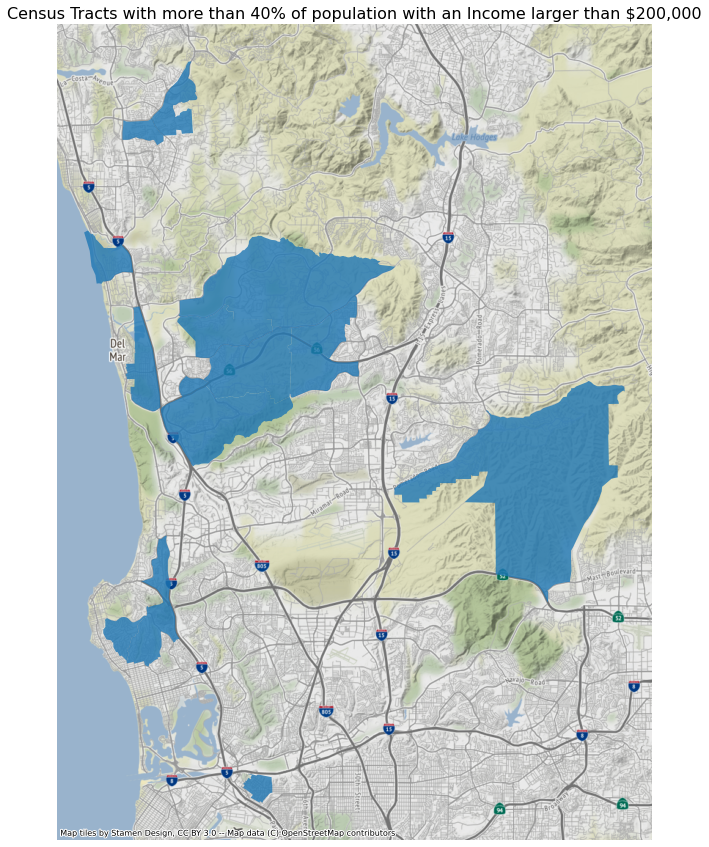

In [85]:
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent $200,000 <'] > 40].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 40% of population with an Income larger than $200,000',fontsize=16)

# add a basemap
ctx.add_basemap(ax)